In [ ]:
# !pip install seaborn

In [ ]:
# import toolkit
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd

In [ ]:
# import sentimental data
amazon_df = pd.read_csv('amazon_df.csv')
gme_df = pd.read_csv('gme_df.csv')
kodak_df = pd.read_csv('kodak_df.csv')
facebook_df = pd.read_csv('fb_df.csv')
apple_df = pd.read_csv('new_data/aapl_df.csv')
baba_df = pd.read_csv('new_data/baba_df.csv')
goog_df = pd.read_csv('new_data/goog_df.csv')
jnj_df = pd.read_csv('new_data/jnj_df.csv')
pfe_df = pd.read_csv('new_data/pfe_df.csv')
tsla_df = pd.read_csv('new_data/tsla_df.csv')

In [ ]:
# renaming columns
amazon_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
gme_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
kodak_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
facebook_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
goog_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
apple_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
baba_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
jnj_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
pfe_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
tsla_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)

# dropping columns

amazon_df.drop(columns=['Unnamed: 0'], inplace=True)
gme_df.drop(columns=['Unnamed: 0'], inplace=True)
kodak_df.drop(columns=['Unnamed: 0'], inplace=True)
facebook_df.drop(columns=['Unnamed: 0'], inplace=True)
apple_df.drop(columns=['Unnamed: 0'], inplace=True)
goog_df.drop(columns=['Unnamed: 0'], inplace=True)
baba_df.drop(columns=['Unnamed: 0'], inplace=True)
jnj_df.drop(columns=['Unnamed: 0'], inplace=True)
pfe_df.drop(columns=['Unnamed: 0'], inplace=True)
tsla_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# import price data
amazon_price_df = pd.read_csv('price/AMZN_1.csv')
gme_price_df = pd.read_csv('price/GME_1.csv')
kodak_price_df = pd.read_csv('price/KODK_1.csv')
facebook_price_df = pd.read_csv('price/FB_1.csv')
apple_price_df = pd.read_csv('price/AAPL.csv')
baba_price_df = pd.read_csv('price/BABA.csv')
goog_price_df = pd.read_csv('price/GOOG.csv')
jnj_price_df = pd.read_csv('price/JNJ.csv')
pfe_price_df = pd.read_csv('price/PFE.csv')
tsla_price_df = pd.read_csv('price/TSLA.csv')

In [5]:
# merging DB

amazon_df = pd.merge(amazon_df, amazon_price_df, how="outer", on=["Date", "Date"]).sort_values(by="Date", ascending=True)
gme_df = pd.merge(gme_df, gme_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
kodak_df = pd.merge(kodak_df, kodak_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
facebook_df = pd.merge(facebook_df, facebook_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
apple_df = pd.merge(apple_df, apple_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
baba_df = pd.merge(baba_df, baba_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
goog_df = pd.merge(goog_df, goog_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
jnj_df = pd.merge(jnj_df, jnj_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
pfe_df = pd.merge(pfe_df, pfe_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
tsla_df = pd.merge(tsla_df, tsla_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)


print(amazon_df.shape)
print(kodak_df.shape)
print(gme_df.shape)
print(facebook_df.shape)

(862, 11)
(653, 11)
(726, 11)
(855, 11)


In [6]:
tsla_df.head()

,Date,Positive,Neutral,Negative,Sentimental Score,Open,High,Low,Close,Adj Close,Volume
783,2019-04-01,2.0,2.0,3.0,0.071,56.523998,57.840000,56.256001,57.835999,57.835999,40552000.0
782,2019-04-02,1.0,2.0,6.0,-0.611,57.660000,57.888000,56.776001,57.175999,57.175999,27394500.0
781,2019-04-03,5.0,3.0,2.0,0.750,57.464001,59.234001,57.433998,58.362000,58.362000,39597000.0
780,2019-04-04,4.0,17.0,31.0,-0.452,52.377998,54.240002,52.118000,53.556000,53.556000,118603500.0
779,2019-04-05,3.0,6.0,5.0,0.214,53.972000,55.220001,53.222000,54.992001,54.992001,65191500.0


In [7]:
facebook_df.drop(columns=['Date'],inplace=True)
kodak_df.drop(columns=['Date'],inplace=True)
gme_df.drop(columns=['Date'],inplace=True)
amazon_df.drop(columns=['Date'],inplace=True)
apple_df.drop(columns=['Date'],inplace=True)
goog_df.drop(columns=['Date'],inplace=True)
baba_df.drop(columns=['Date'],inplace=True)
jnj_df.drop(columns=['Date'],inplace=True)
pfe_df.drop(columns=['Date'],inplace=True)
tsla_df.drop(columns=['Date'],inplace=True)


In [8]:
from sklearn.impute import KNNImputer, SimpleImputer

In [10]:
facebook_df['retorno'] = facebook_df['Close'].pct_change()
kodak_df['retorno'] = kodak_df['Close'].pct_change()
gme_df['retorno'] = gme_df['Close'].pct_change()
amazon_df['retorno'] = amazon_df['Close'].pct_change()
apple_df['retorno'] = apple_df['Close'].pct_change()
goog_df['retorno'] = goog_df['Close'].pct_change()
baba_df['retorno'] = baba_df['Close'].pct_change()
jnj_df['retorno'] = jnj_df['Close'].pct_change()
pfe_df['retorno'] = pfe_df['Close'].pct_change()
tsla_df['retorno'] = tsla_df['Close'].pct_change()

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
preprocessor = ColumnTransformer([('imputer',  KNNImputer(n_neighbors=1),['Open','Low','Close', 'Volume']),('MinMax', MinMaxScaler(),['Open','Low','Close', 'Volume', 'Positive', 'Negative','Neutral','Sentimental Score'])], remainder='passthrough')
filling_na = SimpleImputer(strategy="constant", fill_value=-1000)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('fill_na', filling_na)])

In [ ]:
# gme_np = my_pipeline.fit_transform(gme_df) 
# kodak_np = my_pipeline.fit_transform(kodak_df)
# facebook_np = my_pipeline.fit_transform(facebook_df)
# amazon_np = my_pipeline.fit_transform(amazon_df)
# apple_np = my_pipeline.fit_transform(apple_df)
# google_np = my_pipeline.fit_transform(goog_df)
# baba_np = my_pipeline.fit_transform(baba_df)
# jnj_np = my_pipeline.fit_transform(jnj_df)
# pfe_np = my_pipeline.fit_transform(pfe_df)
# tsla_np = my_pipeline.fit_transform(tsla_df)


In [ ]:
# from tensorflow.keras import models
# from tensorflow.keras import layers
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.layers.experimental.preprocessing import Normalization
# def init_model():
#     #normalizar o x train
#     normalizer = Normalization()
#     model = models.Sequential()
#     model.add(layers.Masking(mask_value=-1000.))
#     normalizer.adapt(X_tesla_treino)
#     model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
#     model.add(layers.LSTM(10, return_sequences=False, activation='tanh'))
#     model.add(layers.Dense(5, activation='relu'))
#     model.add(layers.Dense(10, activation='linear'))
    
#   #  model.compile(loss='mse', 
#   #                optimizer='rmsprop', 
#   #                metrics=['mae'])
#     model.compile(loss='mse', 
#                   optimizer=RMSprop(learning_rate=0.0003), 
#                   metrics=['mae'])
    
#     return model

# #init_model().summary()

In [ ]:
# model.fit(x_train,y_train,epochs=20)

### RNN COM UM ATIVO

In [11]:
apple_df = apple_df.dropna().reset_index()

In [12]:
len(apple_df)

577

In [13]:
y = apple_df['retorno']

In [14]:
X = apple_df.drop(columns=['retorno'])
X

,index,Positive,Neutral,Negative,Sentimental Score,Open,High,Low,Close,Adj Close,Volume
0,816,4.0,1.0,4.0,0.111,47.772499,48.615002,47.762501,48.505001,47.429478,91062800.0
1,815,10.0,3.0,5.0,0.583,48.312500,49.125000,48.287498,48.837502,47.754612,93087200.0
2,814,10.0,2.0,6.0,0.444,48.697498,49.092499,48.285000,48.922501,47.837719,76457200.0
3,813,6.0,2.0,2.0,0.800,49.112499,49.275002,48.982498,49.250000,48.157959,74106400.0
4,810,7.0,0.0,1.0,1.125,49.105000,50.057499,49.084999,50.025002,48.915783,103526800.0
...,...,...,...,...,...,...,...,...,...,...,...
572,6,9.0,5.0,13.0,-0.037,142.750000,145.649994,142.649994,145.110001,145.110001,99788400.0
573,3,4.0,1.0,2.0,0.571,146.210007,146.320007,144.000000,144.500000,144.500000,76299700.0
574,2,20.0,2.0,2.0,1.208,144.029999,147.460007,143.630005,145.639999,145.639999,100827100.0
575,1,16.0,2.0,1.0,1.289,148.100006,149.570007,147.679993,149.149994,149.149994,127050800.0


In [15]:
X = my_pipeline.fit_transform(X)

In [16]:
X[0:60]

array([[4.77724991e+01, 4.77625008e+01, 4.85050011e+01, 9.10628000e+07,
        3.71275222e-02, 4.94232381e-02, 4.89487422e-02, 1.19704405e-01,
        7.69230769e-02, 7.69230769e-02, 1.81818182e-02, 4.58479532e-01,
        8.16000000e+02, 4.86150017e+01, 4.74294777e+01],
       [4.83125000e+01, 4.82874985e+01, 4.88375015e+01, 9.30872000e+07,
        4.22518427e-02, 5.44178653e-02, 5.20907264e-02, 1.25016926e-01,
        1.92307692e-01, 9.61538462e-02, 5.45454545e-02, 6.42495127e-01,
        8.15000000e+02, 4.91250000e+01, 4.77546120e+01],
       [4.86974983e+01, 4.82849998e+01, 4.89225006e+01, 7.64572000e+07,
        4.59052713e-02, 5.43940943e-02, 5.28939306e-02, 8.13757341e-02,
        1.92307692e-01, 1.15384615e-01, 3.63636364e-02, 5.88304094e-01,
        8.14000000e+02, 4.90924988e+01, 4.78377190e+01],
       [4.91124992e+01, 4.89824982e+01, 4.92500000e+01, 7.41064000e+07,
        4.98434085e-02, 6.10298263e-02, 5.59886569e-02, 7.52066593e-02,
        1.15384615e-01, 3.84615385e-0

In [17]:
print(y.shape)
print(X.shape)

(577,)
(577, 15)


In [18]:
X_train = []
y_train = []
for i in range(10, 547):
    X_train.append(X[i-10:i])
    y_train.append(y[i])

In [19]:
# X_train = X[:-30,:]
# y_train = y[:-30]
# X_test = X[-30:,]
# y_test = y[-30:]


In [20]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train.shape

(537, 10, 15)

In [22]:
y_train.shape

(537,)

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping
def init_article_model():
    model = Sequential()
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mse')
    
    return model

def tanise_model():
    #normalizar o x train
    model = models.Sequential()
    model.add(layers.Masking(mask_value=-1000.))
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, return_sequences=False, activation='tanh'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(30, activation='linear'))
    
  #  model.compile(loss='mse', 
  #                optimizer='rmsprop', 
  #                metrics=['mae'])
    model.compile(loss='mse', 
                  optimizer=RMSprop(learning_rate=0.003), 
                  metrics=['mae'])
    
    return model

In [24]:
X_train.shape

(537, 10, 15)

In [25]:
y_train.shape

(537,)

In [26]:
# Fitting the RNN to the Training set
tesla_model = tanise_model()
callback = EarlyStopping(monitor='loss', patience=3)
fitted = tesla_model.fit(X_train, y_train, epochs = 5, batch_size = 12, callbacks=[callback])

ERROR! Session/line number was not unique in database. History logging moved to new session 386
Epoch 1/5
45/45 [==============================] - 37s 95ms/step - loss: 0.0030 - mae: 0.0285
Epoch 2/5
45/45 [==============================] - 3s 71ms/step - loss: 6.6045e-04 - mae: 0.0187
Epoch 3/5
45/45 [==============================] - 3s 71ms/step - loss: 6.1681e-04 - mae: 0.0177
Epoch 4/5
45/45 [==============================] - 3s 69ms/step - loss: 5.9695e-04 - mae: 0.0173
Epoch 5/5
45/45 [==============================] - 3s 75ms/step - loss: 6.0155e-04 - mae: 0.0174


In [ ]:
# # Getting the predicted stock price of 2017
# dataset_train = X.iloc[:780, :]
# dataset_test = y.iloc[780,:]
# dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
# # inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# # inputs = inputs.reshape(-1,1)
# # inputs = sc.transform(inputs)
# # X_test = []
# for i in range(60, 519):
#     X_test.append(inputs[i-60:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# print(X_test.shape)

In [ ]:
len(X)

In [ ]:
len(X_train)

In [27]:
X_test = []
y_test = []
for i in range(547, len(X)):
    X_test.append(X[i-10:i])
    y_test.append(y[i])

In [28]:
X_test = np.array(X_test)
X_test

array([[[123.16000366, 122.86000061, 124.69000244, ...,  54.        ,
         124.91999817, 124.69000244],
        [125.23000336, 125.09999847, 127.30999756, ...,  53.        ,
         127.72000122, 127.30999756],
        [127.81999969, 125.20999908, 125.43000031, ...,  52.        ,
         128.        , 125.43000031],
        ...,
        [125.56999969, 124.55000305, 124.61000061, ...,  45.        ,
         125.80000305, 124.61000061],
        [125.08000183, 123.94000244, 124.27999878, ...,  41.        ,
         125.34999847, 124.27999878],
        [124.27999878, 124.05000305, 125.05999756, ...,  40.        ,
         125.23999786, 125.05999756]],

       [[125.23000336, 125.09999847, 127.30999756, ...,  53.        ,
         127.72000122, 127.30999756],
        [127.81999969, 125.20999908, 125.43000031, ...,  52.        ,
         128.        , 125.43000031],
        [126.01000214, 125.94000244, 127.09999847, ...,  49.        ,
         127.94000244, 127.09999847],
        ...,


In [29]:
X_test.shape

(30, 10, 15)

In [30]:
previsao = tesla_model.predict(X_test)

In [31]:
tesla_model.predict(X_test).shape

(30, 30)

In [32]:
previsao[0]

array([ 6.0000550e-03,  6.6770427e-04,  8.8357888e-03, -4.3984540e-03,
        4.0360708e-03,  5.4935301e-03,  6.8415450e-03,  8.0767460e-03,
        8.6272452e-03,  7.2241053e-03, -1.2025610e-03,  5.5446401e-03,
        6.2487684e-03,  6.1882092e-03, -2.2658715e-03, -1.3665073e-03,
        6.4451955e-03,  7.9403371e-03,  9.1592651e-03,  4.1969307e-04,
        9.2163216e-05,  1.0435515e-02,  7.1953703e-03,  9.4576534e-03,
        8.1165181e-04,  1.8875040e-03, -4.1180290e-05, -4.2155315e-04,
        4.6143681e-03,  4.1573653e-03], dtype=float32)

In [ ]:
plt.plot(tsla_df['retorno'])

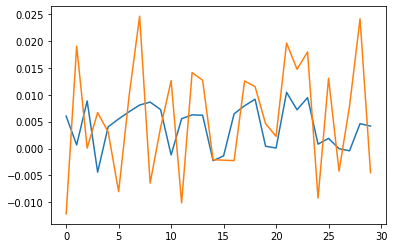

In [33]:
plt.plot(previsao[0])
plt.plot(y_test)

In [34]:
previsao[0]

array([ 6.0000550e-03,  6.6770427e-04,  8.8357888e-03, -4.3984540e-03,
        4.0360708e-03,  5.4935301e-03,  6.8415450e-03,  8.0767460e-03,
        8.6272452e-03,  7.2241053e-03, -1.2025610e-03,  5.5446401e-03,
        6.2487684e-03,  6.1882092e-03, -2.2658715e-03, -1.3665073e-03,
        6.4451955e-03,  7.9403371e-03,  9.1592651e-03,  4.1969307e-04,
        9.2163216e-05,  1.0435515e-02,  7.1953703e-03,  9.4576534e-03,
        8.1165181e-04,  1.8875040e-03, -4.1180290e-05, -4.2155315e-04,
        4.6143681e-03,  4.1573653e-03], dtype=float32)